Attempt the following question with the help of given data set.


months = 
[&#39;January&#39;, &#39;February&#39;, &#39;March&#39;, &#39;April&#39;, &#39;May&#39;, &#39;June&#39;, &#39;July&#39;, &#39;August&#39;,
&#39;September&#39;, &#39;October&#39;, &#39;November&#39;, &#39;December&#39;]

sales of smart phone = [5L, 6L, 7.5L, 3L, 1L, 1.2L, 1L, 5L, 8L, 9.5L, 10L, 7L]

sales of laptop = [25L, 36L, 22.5L, 33L, 41L, 10.2L, 5L, 20L, 28L, 39.5L, 31L, 37L]



a. Write a python code to visualize the monthly sales of smart phones and Laptops in
vertical bar chart from the following data set.


b. Write a python code to visualize the monthly sales of smart phones and Laptops in
horizontal bar chart from the following data set.


c. Write a python code to determine the correlation in between two selling product.

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

# a. Write a python code to visualize the monthly sales of smart phones and Laptops in
vertical bar chart from the following data set.

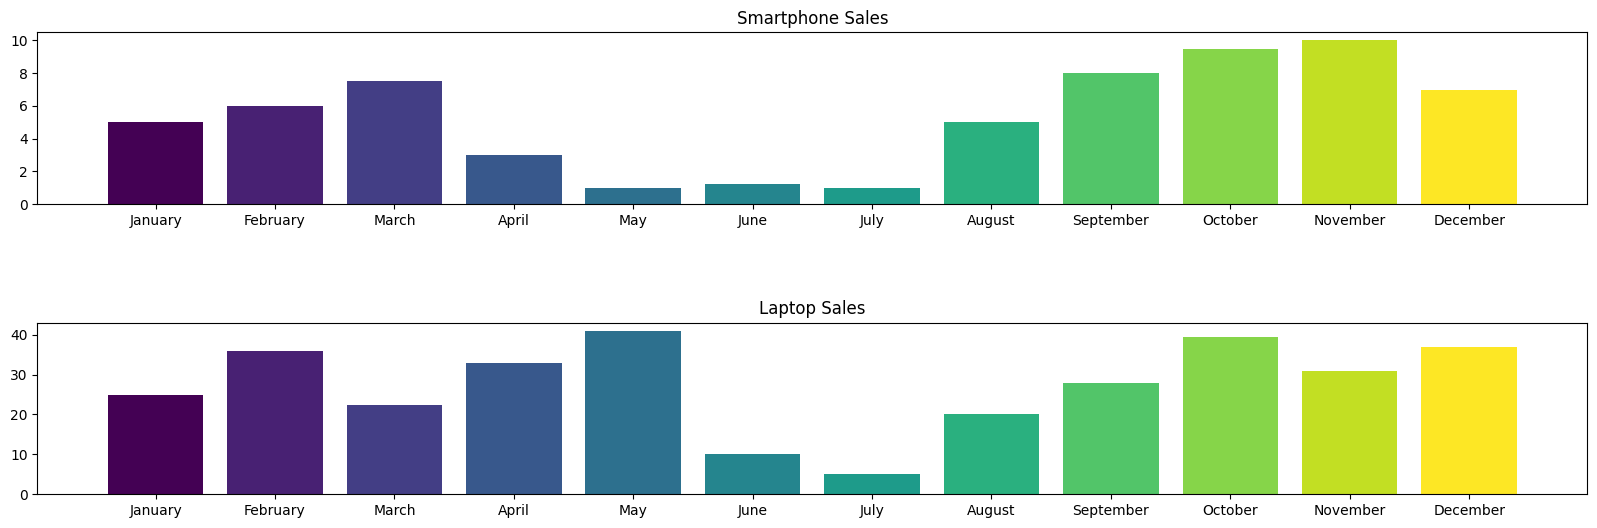

In [63]:
# Bar Chart : 

month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
smartphone_sales = [5, 6, 7.5, 3, 1, 1.2, 1, 5, 8, 9.5, 10, 7]
laptop_sales = [25, 36, 22.5, 33, 41, 10.2, 5, 20, 28, 39.5, 31, 37]

bar_colors = plt.cm.viridis(np.linspace(0, 1, len(month))) # Creates a list of colors for each bar

fig, ax = plt.subplots(2, 1, figsize=(20, 6)) # Creates a figure with two subplots of two rows and one coloumn

ax[0].bar(month, smartphone_sales, color=bar_colors) # Creates a bar chart for smartphone sales
ax[0].set_title("Smartphone Sales")

ax[1].bar(month, laptop_sales, color=bar_colors) # Creates a bar chart for laptop sales
ax[1].set_title("Laptop Sales")

plt.subplots_adjust(hspace=0.69) # Adjust the layout to include a gap between subplots

plt.show()

# b. Write a python code to visualize the monthly sales of smart phones and Laptops in
horizontal bar chart from the following data set.

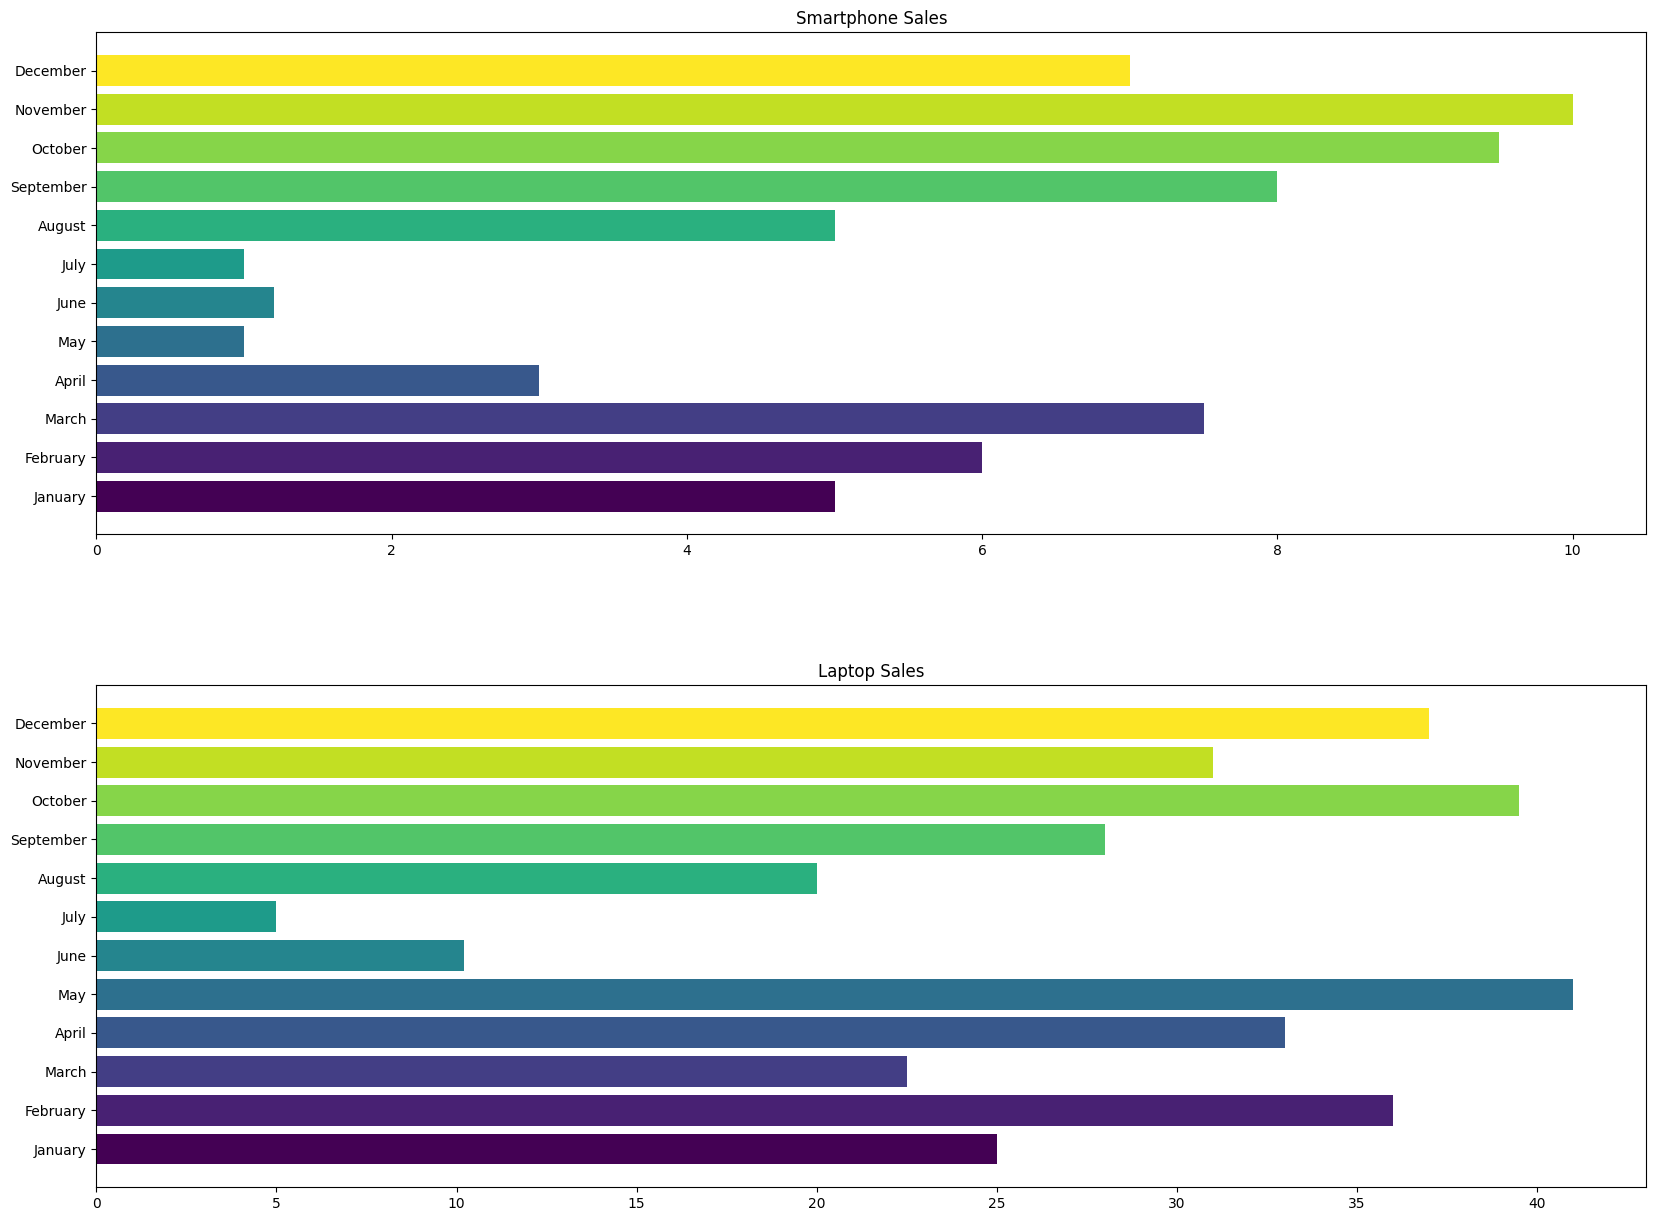

In [64]:
# Horizontal Bar Chart : 
month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
smartphone_sales = [5, 6, 7.5, 3, 1, 1.2, 1, 5, 8, 9.5, 10, 7]
laptop_sales = [25, 36, 22.5, 33, 41, 10.2, 5, 20, 28, 39.5, 31, 37]

bar_colors = plt.cm.viridis(np.linspace(0, 1, len(month))) # Creates a list of colors for each bar

fig, ax = plt.subplots(2, 1, figsize=(20, 15)) # Creates a figure with two subplots of two rows and one coloumn

ax[0].barh(month, smartphone_sales, color=bar_colors) # Creates a bar chart for smartphone sales
ax[0].set_title("Smartphone Sales")

ax[1].barh(month, laptop_sales, color=bar_colors) # Creates a bar chart for laptop sales
ax[1].set_title("Laptop Sales")

plt.subplots_adjust(hspace=0.3) # Adjust the layout to include a gap between subplots

plt.show()

# c. Write a python code to determine the correlation in between two selling product.

r=n(Σxy)−(Σx)(Σy) / √[nΣx<sup>2</sup>−(Σx)2<sup>2</sup>][nΣy<sup>2</sup>−(Σy)<sup>2</sup>]

n = number of pairs of scores

Σxy = sum of the products of the paired scores

Σx = sum of x scores

Σy = sum of y scores

Σx<sup>2</sup> = sum of sqaured x scores

Σy<sup>2</sup> = sum of squared y scores

In [65]:
# Calculating correlation using Pearson Correlation Coefficient :
def pearson_coeff(x, y):
    N = len(x)
    xy_sum = [x * y for x, y in zip(x, y)]
    x_squared = [x ** 2 for x in x]
    y_squared = [y ** 2 for y in y]
    x_sum = sum(x)
    y_sum = sum(y)
    
    pearson_coefficient = (N * sum(xy_sum) - x_sum * y_sum) / np.sqrt((N * sum(x_squared) - x_sum ** 2) * (N * sum(y_squared) - y_sum ** 2))
    
    return pearson_coefficient

print(f"Correlation between smartphone_sales and laptop_sales : {pearson_coeff(smartphone_sales, laptop_sales)}")

Correlation between smartphone_sales and laptop_sales : 0.44422991732100287


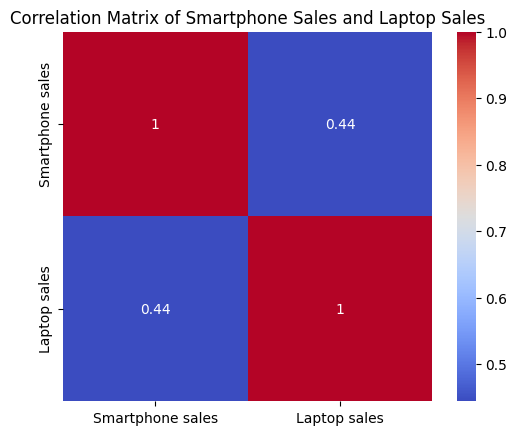

In [66]:
data = {
    'Smartphone sales': smartphone_sales,
    'Laptop sales': laptop_sales
}

df = pd.DataFrame(data)
# Calculating correlation matrix
corr_matrix = df.corr()

# Visualizing correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Smartphone Sales and Laptop Sales')
plt.show()

## Finding Correlation using Predefined Function

In [67]:
correlation_coefficient = np.corrcoef(smartphone_sales, laptop_sales)[0, 1] # Calculate correlation coefficient using Pearson method
"""
np.corrcoef(x, y) 
calculates the correlation coefficient matrix for the two lists, 
and [0, 1] extracts the correlation coefficient from the matrix.
"""
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.44422991732100264


# Exploring Different Correlation Coefficient : Spearman, Kendall

## Spearman Correlation : 

In [68]:
def spearman_rank_correlation(x, y):
    n = len(x)
    
    ranks_x = rank_data(x)
    ranks_y = rank_data(y)
    # Calculates the differences between ranks
    d = [ranks_x[i] - ranks_y[i] for i in range(n)]
    # Calculates the Spearman coefficient
    rho = 1 - (6 * sum(d_i**2 for d_i in d)) / (n * (n**2 - 1))
    return rho

def rank_data(data):
    ranked_data = {}
    sorted_data = sorted(enumerate(data), key=lambda x: x[1])
    for rank, (index, value) in enumerate(sorted_data):
        ranked_data[index] = rank + 1
    return ranked_data


spearman_coefficient = spearman_rank_correlation(smartphone_sales, laptop_sales)
print("Spearman correlation coefficient:", spearman_coefficient)


Spearman correlation coefficient: 0.22377622377622375


## Kendall Correlation

In [69]:
def kendall_tau(x, y):
    n = len(x)
    concordant_pairs = 0
    discordant_pairs = 0
    
    for i in range(n - 1):
        for j in range(i + 1, n):
            # Check for concordant and discordant pairs
            if (x[i] < x[j] and y[i] < y[j]) or (x[i] > x[j] and y[i] > y[j]):
                concordant_pairs += 1
            elif (x[i] < x[j] and y[i] > y[j]) or (x[i] > x[j] and y[i] < y[j]):
                discordant_pairs += 1

    # Calculate Kendall's tau
    tau = (concordant_pairs - discordant_pairs) / (0.5 * n * (n - 1))

    return tau

kendall_coefficient = kendall_tau(smartphone_sales, laptop_sales)
print("Kendall correlation coefficient:", kendall_coefficient)

Kendall correlation coefficient: 0.2727272727272727
